# Python Project (Part - 1) : By Harsh Chaudhary

1. Import required libraries and read the dataset. 

In [237]:
# importing requisite libraries
import pandas as pd                                                            #for data reading
import seaborn as sns                                                          #for statistical graphics
import numpy as np                                                             #for numerical computation
import matplotlib.pyplot as plt                                             #for statistical graphics
from sklearn.model_selection import train_test_split           # splitting data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
                                             

In [238]:
df=pd.read_csv("D:\harsh\Apps_data.csv")

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [239]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [240]:
df.shape

(10841, 13)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [242]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [14]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [15]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [31]:
for col in df.columns:
    print(col," - ", df[col].nunique())

App  -  9660
Category  -  34
Rating  -  40
Reviews  -  6002
Size  -  462
Installs  -  22
Type  -  3
Price  -  93
Content Rating  -  6
Genres  -  120
Last Updated  -  1378
Current Ver  -  2832
Android Ver  -  33


In [ ]:
#   The columns that needs to be work upon for model building are Category , Size , Install , Type , Price , Content Rating  

4. Check if there are any duplicate records in the dataset? if any drop them.

In [43]:
df.duplicated().sum()

483

In [47]:
df=df.drop_duplicates()

5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [53]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

6. Check if there are missing values present in the column Rating, If any? drop them and and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [55]:
df.Rating.isna().sum()

1465

In [243]:
df = df.dropna(subset=['Rating'])


In [244]:
df.Rating.isna().sum()

0

In [245]:
# Creating 'Rating_category' column
df['Rating_category'] = df['Rating'].apply(lambda x: 'High' if x > 3.5 else 'Low')


In [246]:
df.Rating_category.nunique()

2

7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [247]:
df.groupby("Rating_category").count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Rating_category,,,,,,,,,,,,,
High,8471,8471,8471,8471,8471,8471,8471,8471,8470,8471,8471,8468,8468
Low,896,896,896,896,896,896,896,896,896,896,896,895,896


In [ ]:
# There are 8013 data point belonging to High category and 880 data points belonging to Low category.

8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)

In [251]:
df['Reviews'] = df['Reviews'].str.replace('M', '').astype(float) * 1e6


In [252]:
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)

In [253]:
IQR=Q3-Q1
print(f"IQR = {IQR}")

IQR = 81336500000.0


In [254]:
outliers = df[(df['Reviews'] < (Q1 - 1.5 * IQR)) | (df['Reviews'] > (Q3 + 1.5 * IQR))]['Reviews']
print(f"No. of Outliers: {outliers.count()}")

No. of Outliers: 1634


In [256]:
df["Reviews"]=np.log(df["Reviews"])
df.Reviews.head(5).to_frame()


,Reviews
0,2.938337
1,3.029636
2,3.226646
3,3.261816
4,3.029636


9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device')

In [257]:
for index in df.index:
    col = str(df.loc[index,'Size'])
    if 'M' in col:
        df.loc[index,'Size'] = round(float(col.split('M')[0]))*1000000
    elif 'k' in col:
        df.loc[index,'Size'] = round(float(col.split('k')[0]))*1000
    elif col == 'Varies with device':
        df.loc[index,'Size'] = None


In [258]:
df.dropna(subset=['Size'],inplace=True) 

In [259]:
df.Size.isna().sum()

0

In [260]:
df.Size.to_frame().head(5)

,Size
0,19000000
1,14000000
2,9000000
3,25000000
4,3000000


10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [261]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.938337,19000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High


In [262]:
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=df['Installs'].str.replace('+','')
df = df[df['Installs'] != 'Free']
df['Installs'] = df['Installs'].astype(int)



C:\Users\HARSH CHAUDHARY\AppData\Local\Temp\ipykernel_14036\1299406824.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs']=df['Installs'].str.replace('+','')


In [263]:
df.Installs.dtypes


dtype('int32')

11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.


In [264]:
df['Price']=df['Price'].str.replace('$',"").astype('float')

C:\Users\HARSH CHAUDHARY\AppData\Local\Temp\ipykernel_14036\1104971242.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$',"").astype('float')


In [265]:
df.Price.dtypes

dtype('float64')

12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [266]:
df=df.drop(['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'],axis=1)

13. Encode the categorical columns.


In [270]:
df.head(5)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,2.938337,19000000,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,3.029636,14000000,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,3.226646,9000000,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,3.261816,25000000,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,3.029636,3000000,100000,Free,0.0,Everyone,High


In [271]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

# Label Encoding 
df['Category'] = le.fit_transform(df['Category'])
df['Type'] = le.fit_transform(df['Type'])
df['Content Rating'] = le.fit_transform(df['Content Rating'])
df['Rating_category'] = le.fit_transform(df['Rating_category'])

# One-Hot Encoding
ohe = OneHotEncoder()
category_ohe = ohe.fit_transform(df.Category.values.reshape(-1,1)).toarray()
type_ohe = ohe.fit_transform(df.Type.values.reshape(-1,1)).toarray()


14. Segregate the target and independent features (Hint: Use Rating_category as the target)


In [274]:
X = df.drop('Rating_category', axis=1)
Y = df['Rating_category']


15. Split the dataset into train and test.


In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)


16. Standardize the data, so that the values are within a particular range.

In [278]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Part - 2

1. Import required libraries and read the dataset.

In [11]:
import pandas as pd                                                            #for data reading
import seaborn as sns                                                          #for statistical graphics
import numpy as np                                                             #for numerical computation
import matplotlib.pyplot as plt                                             #for statistical graphics

In [ ]:
df1 = pd.read_csv('D:/harsh/honey_production.csv')

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [12]:
df1.head(3)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998


In [14]:
df1.shape

(626, 8)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


3. Display the percentage distribution of the data in each year using the pie chart.


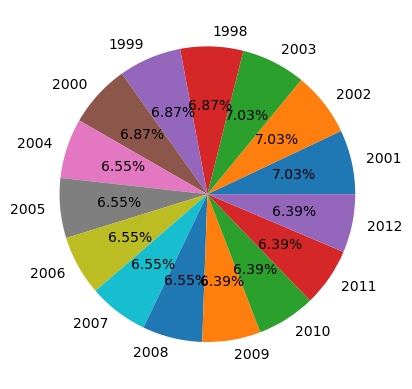

In [23]:
data=(df1.year.value_counts()/len(df1))*100
plt.pie(data,labels=data.index,autopct="%1.2f%%")
plt.show()

4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.


C:\Users\HARSH CHAUDHARY\Desktop\New folder\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


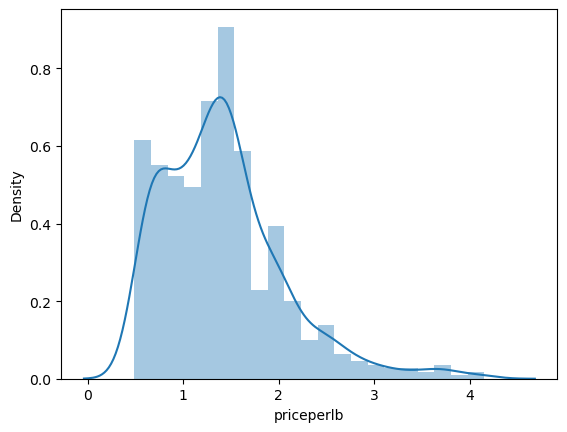

In [28]:
sns.distplot(df1.priceperlb)
plt.show()

In [29]:
# 1. Data Points in the column priceperlb are skewed in the right direction which means that mean is greater  than median.
# 2.Right-skewness often means that there are a significant number of data points with values higher than the mode which means
# that outliers exist in the high value range

5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and
write your findings.


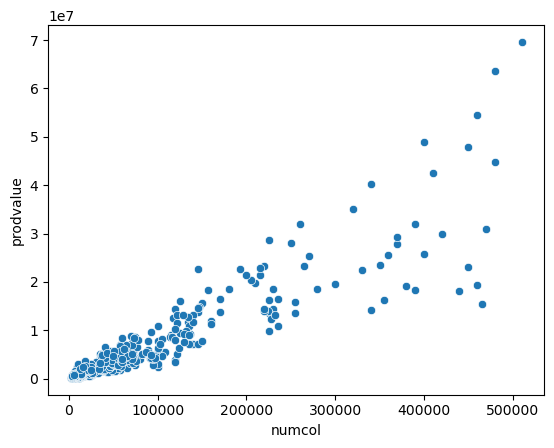

In [34]:
sns.scatterplot(x=df1.numcol , y=df1.prodvalue)
plt.show()

In [35]:
# 1. By observing the scatterplot we can say that there is a positive correlation between numcol and prodvalue.
# 2. The tighter the data points cluster along a straight line, the stronger the positive linear relationship but there are some outliers as
# Scatter plot makes it easy to spot outliers, i.e., data points that do not fit the general trend of the data.

6. Plot and understand the relationship between categorical variable 'year' and a numerical variable
'prodvalue' through boxplot, and write your finding

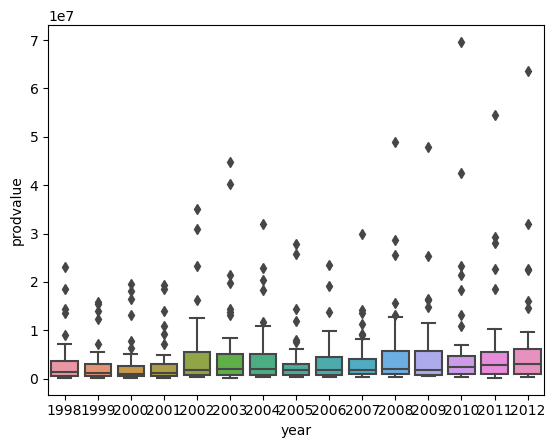

In [42]:
sns.boxplot(x=df1.year , y=df1.prodvalue)
plt.show()

7. Visualize and understand the relationship between the multiple pairs of variables throughout different years
using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')


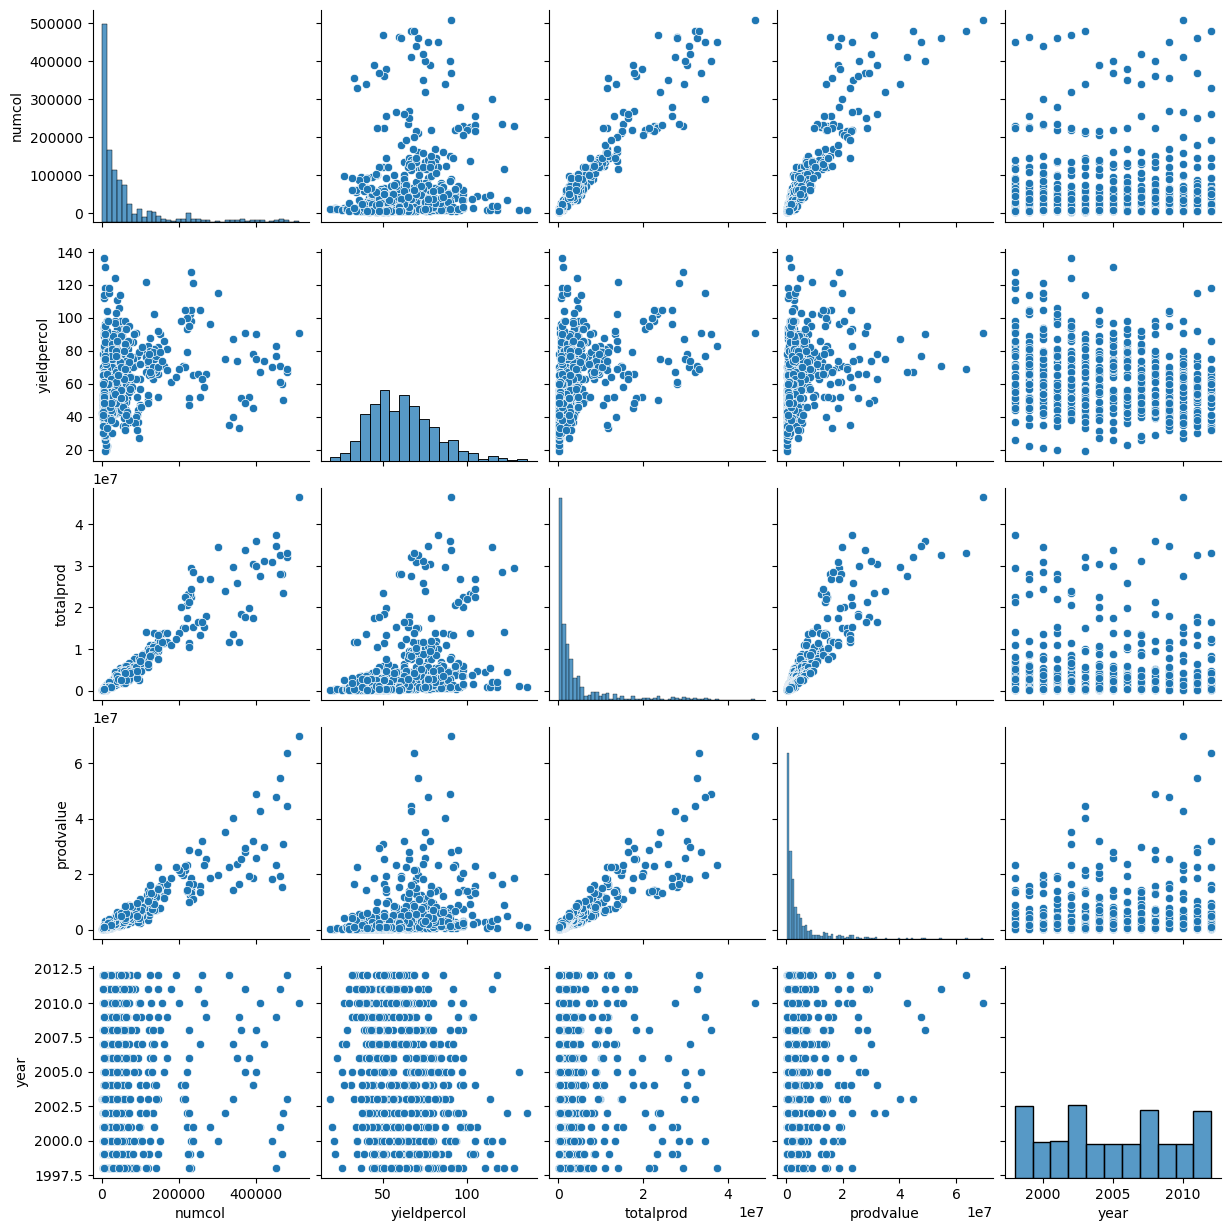

In [67]:
sns.pairplot(df1[['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']],  diag_kind='hist')
plt.show()

In [ ]:
# 1. There is positive correlation between numcol and total prod.  The tighter the data points cluster along a straight line, the stronger the positive
# linear relationship but there are some outliers.
# 2. There is also a linear positive correlation between total prod and prodvalue which means as the total production increases the product value increases 
#     which is an obvious case.

8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol',
'total prod', 'stocks', 'price per lb', 'prodvalue')

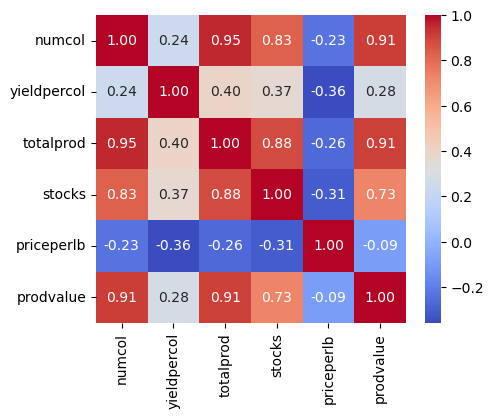

In [66]:
plt.figure(figsize=(5,4))
sns.heatmap(df1[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
# 1. There is a positive correlation between numcol(Number of honey producing colonies) and prodvalue(Value of production (total prod x priceperlb).
# 2. There is a positive correlation between numcol(Number of honey producing colonies) and total prod( Total production (numcol x yieldpercol). (Unit is pound)
# 3. Between yieldpercol and priceperlab there is a negative correlation as the Honey yield per colony(Unit is pounds) increases the price per lb 
#     (Refers to average price per pound based on expanded sales. Unit is dollars) decreases.
# 4. Positive correlation exist of 0.73 between stocks(Refers to stocks held by producers) and prodvalue(Value of production (total prod x priceperlb)).                                                                                              